In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [3]:
def census_age_array(path = "./data/census_age.csv"):
    '''
    create array of integers that represent age distribution of US population
    array will be used to plot kernel density estimation of US population's age
    '''
    # load data and scale down count to decrease number of data points
    census_age = pd.read_csv(path)
    census_age["count"] = np.ceil(census_age["count"] / 1000).astype(int)
    
    # create empty array with length of integer total_us_population
    total_us_population = sum(census_age.loc[:, 'count'])
    array = np.full(total_us_population, np.nan)
    
    # fill in array with ages
    index = 0
    for row in census_age.values:
        age, freq = row[0], row[1]
        temp = np.repeat(age, freq)
        array[index:index + freq] = temp
        index = index + freq
    
    # convert to pandas Series for use with matplotlib
    return pd.Series(array)

census_age = pd.read_csv("./data/census_age.csv")
us_age_array = census_age_array()
casuality_age_array = pd.read_csv("./data/shooting.csv").loc[:, 'age'].dropna()



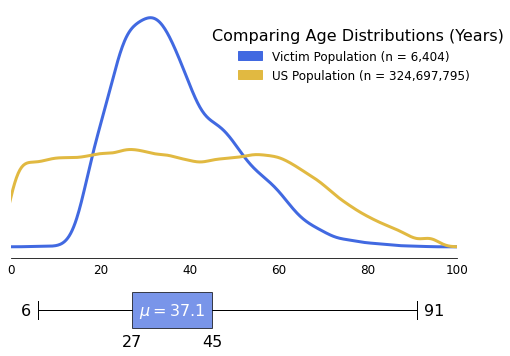

In [5]:
f, [ax_kde, ax_box] = plt.subplots(2, figsize = (8, 6), sharex = True, gridspec_kw = {'height_ratios':(0.85, 0.15)})

casuality_age_array.plot.density(ax = ax_kde, linewidth = 3, color = '#4169E1',)

us_age_array.plot.density(ax = ax_kde, linewidth = 3, color = '#E1B941')
ax_kde.text(45, .03, 'Comparing Age Distributions (Years)', fontsize = 16)

ax_kde.set_xlabel('Years', fontsize = 14)
ax_kde.set_xlim(0, 100)

ax_kde.get_yaxis().set_visible(False)
ax_kde.tick_params(axis = 'x', length = 0)

ax_kde.spines['top'].set_visible(False)
ax_kde.spines['right'].set_visible(False)
ax_kde.spines['left'].set_visible(False)


numV = '{:,}'.format(len(casuality_age_array.values))
numUS = '{:,}'.format(sum(census_age.loc[:, 'count']))

victim_patch = mpatches.Patch(color = '#4169E1', label = 'Victim Population (n = ' + numV + ')')
us_patch = mpatches.Patch(color = '#E1B941', label = 'US Population (n = ' + numUS + ')')
ax_kde.legend(handles = [victim_patch, us_patch], prop = {'size': 12}, frameon = False, bbox_to_anchor = (.485, 0.87))


bp = ax_box.boxplot(casuality_age_array.values, vert = False, showmeans = False, patch_artist = True, widths = 0.8, whis = 3)

plt.setp(bp['medians'], alpha = 0)
for patch in bp['boxes']:
    patch.set(facecolor = '#4169E1', alpha = .7)

ax_box.tick_params(size = 0, labelsize = 12, pad = 12)
ax_box.xaxis.tick_top()
ax_box.set_yticks([])

[ax_box.spines[s].set_visible(False) for s in ax_box.spines]

[mi, p25, p75, ma] = np.quantile(casuality_age_array.values, [0, 0.25, 0.75, 1]).astype(int)

ax_box.text(ma + 1.5, 1, str(ma), fontsize = 16, ha = 'left', va = 'center')
ax_box.text(mi - 1.5, 1, str(mi), fontsize = 16, ha = 'right', va = 'center')
ax_box.text(p25, .3, str(p25), fontsize = 16, ha = 'center', va = 'center')
ax_box.text(p75, .3, str(p75), fontsize = 16, ha = 'center', va = 'center')

x = p75 - (p75 - p25) / 2
m = round(np.mean(casuality_age_array.values), 2)
ax_box.text(x, 1, '$\mu = $' + str(m), fontsize = 16, ha = 'center', va = 'center', color = 'white')

plt.show()